100 самых частых слов и их относительные частоты во всех текстах:
1. the: 0.056338
2. and: 0.031101
3. of: 0.029540
4. to: 0.025882
5. a: 0.021045
6. in: 0.018057
7. i: 0.015551
8. that: 0.014017
9. it: 0.013192
10. his: 0.011760
11. was: 0.011301
12. he: 0.010857
13. you: 0.008983
14. with: 0.008612
15. as: 0.008434
16. is: 0.008015
17. for: 0.007543
18. not: 0.007104
19. but: 0.007015
20. had: 0.006911
21. her: 0.006871
22. at: 0.006719
23. be: 0.006338
24. have: 0.005645
25. him: 0.005435
26. all: 0.005301
27. on: 0.005289
28. this: 0.005081
29. my: 0.005059
30. by: 0.004881
31. she: 0.004671
32. so: 0.004613
33. from: 0.004472
34. which: 0.004027
35. me: 0.003847
36. were: 0.003802
37. there: 0.003773
38. they: 0.003437
39. no: 0.003435
40. one: 0.003388
41. said: 0.003150
42. or: 0.003091
43. what: 0.003037
44. been: 0.003000
45. when: 0.002970
46. mr: 0.002955
47. are: 0.002872
48. an: 0.002802
49. if: 0.002755
50. would: 0.002697
51. their: 0.002504
52. now: 0.002499
53. your: 0

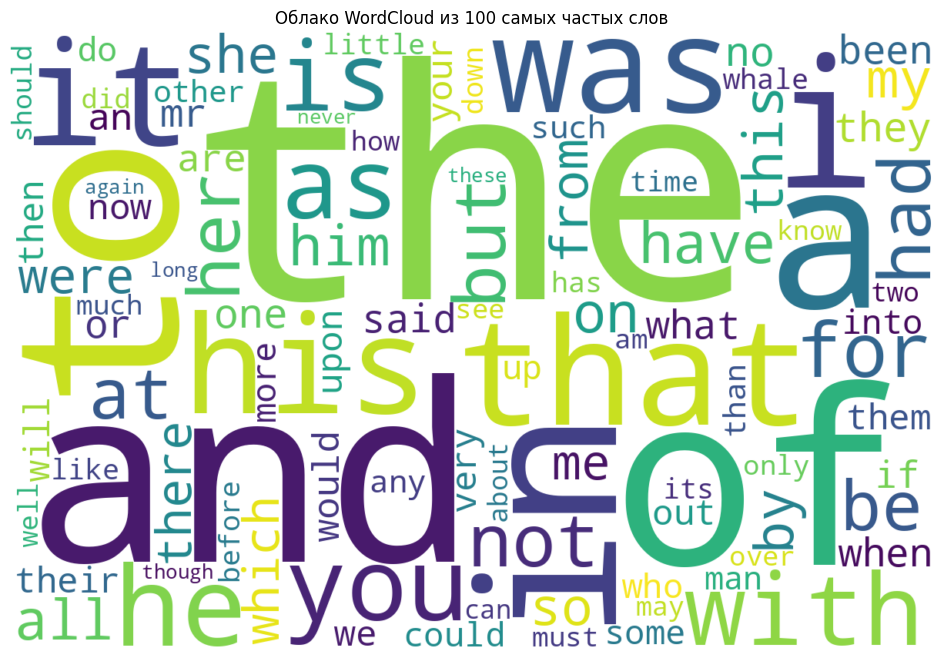

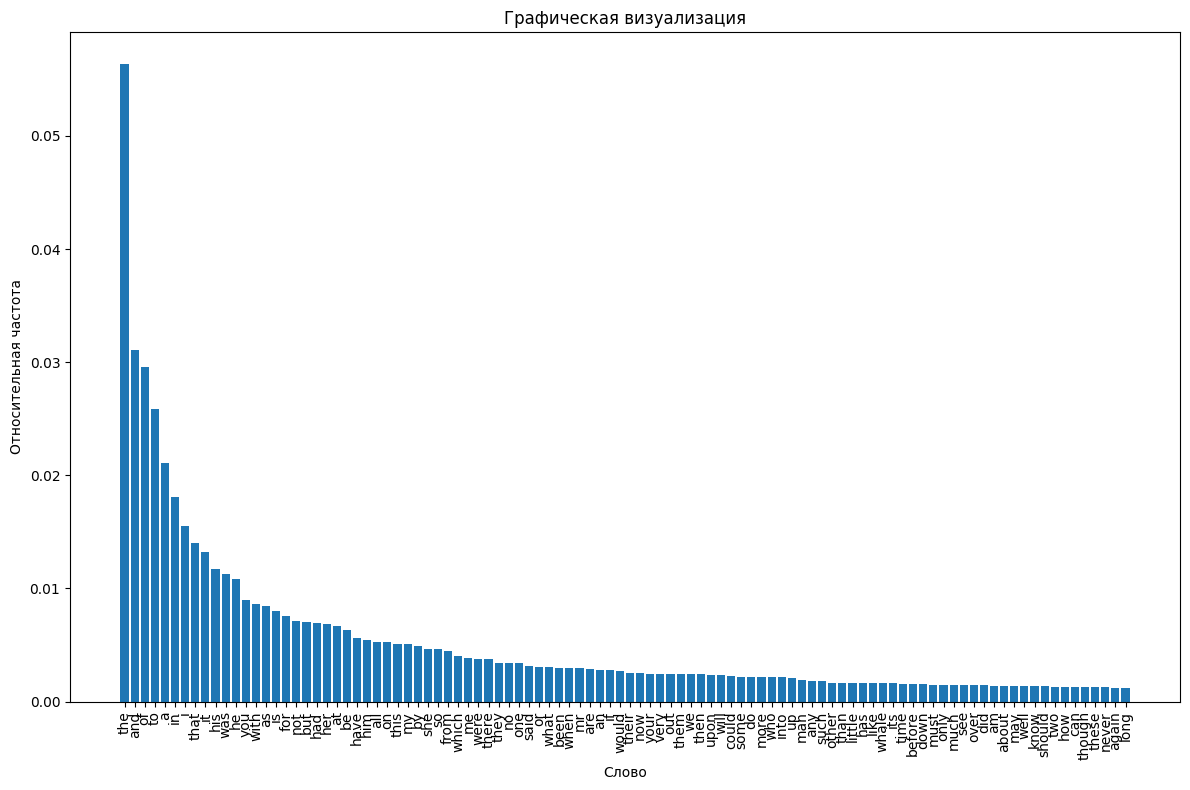

In [20]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Функция для получения текста с URL
def fetch_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup.get_text()

# Функция для предварительной обработки текста
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Список URL для получения текстов
urls = [
    "https://www.gutenberg.org/files/1342/1342-0.txt",  # Гордость и предубеждение
    "https://www.gutenberg.org/files/1952/1952-0.txt",  # Великое ожидание
    "https://www.gutenberg.org/files/2701/2701-0.txt",  # Моби Дик
    "https://www.gutenberg.org/files/98/98-0.txt",      # Повесть о двух городах
    "https://www.gutenberg.org/files/1661/1661-0.txt",  # Приключения Гекльберри Финна
]

# Получение и предварительная обработка текстов
texts = []
for url in urls:
    text = fetch_text(url)
    text = preprocess_text(text)
    texts.append(text)

# Нахождение 100 самых частых слов во всех текстах
combined_text = " ".join(texts)
word_counts = Counter(combined_text.split())
total_words = sum(word_counts.values())
common_words_with_freqs = [(word, count / total_words) for word, count in word_counts.most_common(100)]
common_words = [word for word, _ in common_words_with_freqs]

# Вывод 100 самых частых слов с их относительными частотами
print("100 самых частых слов и их относительные частоты во всех текстах:")
for i, (word, freq) in enumerate(common_words_with_freqs, 1):
    print(f"{i}. {word}: {freq:.6f}")

print()

# Векторизация текстов на основе 100 самых частых слов
vectorizer = TfidfVectorizer(vocabulary=common_words)
X = vectorizer.fit_transform(texts).toarray()

# Кластеризация текстов с помощью KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Визуализация самых частых слов с помощью WordCloud
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate_from_frequencies(dict(common_words_with_freqs))

# Построение облака WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако WordCloud из 100 самых частых слов')
plt.show()

print()

# Построение относительных частот 100 самых частых слов
words, freqs = zip(*common_words_with_freqs)
plt.figure(figsize=(12, 8))
plt.bar(words, freqs)
plt.xlabel('Слово')
plt.ylabel('Относительная частота')
plt.title('Графическая визуализация')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
